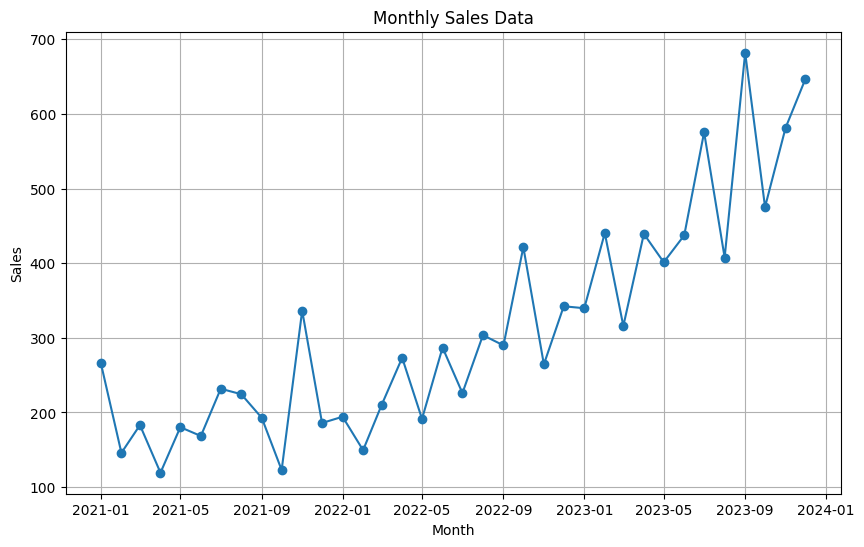

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your data in a DataFrame named df
# If not, you can create it as follows:
data = {
    'Month': ['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'],
    'Sales': [266, 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8, 122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287, 226, 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9, 439.3, 401.3, 437.4, 575.5, 407.6, 682, 475.3, 581.3, 646.9]
}

df = pd.DataFrame(data)

# Convert 'Month' column to datetime type
df['Month'] = pd.to_datetime(df['Month'])

# Set 'Month' column as the index
df.set_index('Month', inplace=True)

# Plot the sales data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Sales'], marker='o', linestyle='-')
plt.title('Monthly Sales Data')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


Using LSTM to predict sales for 2024-01-01 - 2024-12-01



- We scale the sales data using Min-Max scaling.
- LSTM sequences are created from the scaled data.
-The LSTM model is defined and trained on the training data.
- Predictions are made for the next 12 months (2024) using the trained model.
- The predicted sales are inverse scaled to obtain the actual sales values.
-The results are printed in a DataFrame showing the predicted sales for each month in 2024.


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Prepare the data
sales_data = df['Sales'].values.reshape(-1, 1)  # Reshape to 2D array for scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_sales = scaler.fit_transform(sales_data)

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length
sequence_length = 12  # Use data from the past year to predict the next month

# Create sequences
X, y = create_sequences(scaled_sales, sequence_length)



In [11]:
sales_data

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [12]:
scaled_sales

array([[0.2607073 ],
       [0.04727208],
       [0.11338191],
       [0.        ],
       [0.1084059 ],
       [0.08743558],
       [0.19992891],
       [0.18695575],
       [0.13062022],
       [0.00639773],
       [0.38599609],
       [0.11835792],
       [0.13328594],
       [0.05366981],
       [0.16136485],
       [0.27368047],
       [0.12813222],
       [0.29802737],
       [0.18962147],
       [0.32752799],
       [0.30318109],
       [0.53723121],
       [0.25804159],
       [0.39630354],
       [0.39168296],
       [0.57064155],
       [0.34938688],
       [0.56868669],
       [0.50115514],
       [0.56531011],
       [0.81073396],
       [0.51235116],
       [1.        ],
       [0.63266394],
       [0.82104141],
       [0.93762218]])

In [7]:
X[0]

array([[0.2607073 ],
       [0.04727208],
       [0.11338191],
       [0.        ],
       [0.1084059 ],
       [0.08743558],
       [0.19992891],
       [0.18695575],
       [0.13062022],
       [0.00639773],
       [0.38599609],
       [0.11835792]])

In [8]:
y[0]

array([0.13328594])

In [13]:
# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

In [18]:
#Predict sales for 2024
predicted_sales = []

# Use last sequence from training data as initial input for prediction
current_sequence = X_train[-1]

for i in range(12):
    # Reshape sequence for prediction
    current_sequence = current_sequence.reshape((1, sequence_length, 1))
    # Predict next sales value
    next_sales = model.predict(current_sequence, verbose=0)
    # Append predicted value to list
    predicted_sales.append(next_sales[0][0])
    # Update sequence for next prediction
    current_sequence = np.append(current_sequence[:, 1:, :], [[next_sales[0]]], axis=1)

# Inverse scale the predicted sales
predicted_sales = scaler.inverse_transform(np.array(predicted_sales).reshape(-1, 1))

# Generate dates for the predicted sales
dates_2024 = pd.date_range(start='2024-01-01', end='2024-12-01', freq='MS')

# Create DataFrame for predicted sales
predicted_df = pd.DataFrame({
    'Date': dates_2024,
    'Predicted Sales': predicted_sales.flatten()
})

print(predicted_df)

         Date  Predicted Sales
0  2024-01-01       487.960938
1  2024-02-01       528.752563
2  2024-03-01       568.182983
3  2024-04-01       619.131409
4  2024-05-01       663.285583
5  2024-06-01       748.302124
6  2024-07-01       844.435303
7  2024-08-01       977.755310
8  2024-09-01      1140.031860
9  2024-10-01      1431.006348
10 2024-11-01      1840.626953
11 2024-12-01      2576.910400


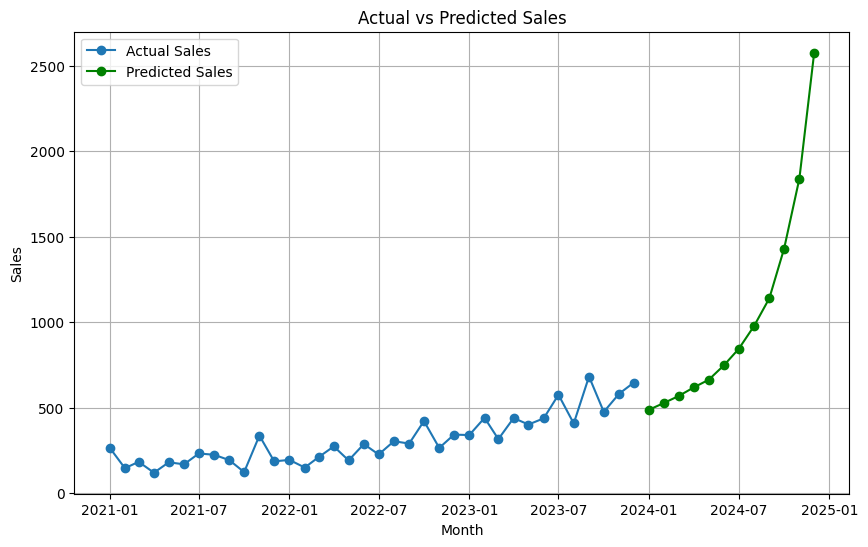

In [19]:
# Plot actual and predicted sales
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Sales'], marker='o', linestyle='-', label='Actual Sales')
plt.plot(predicted_df['Date'], predicted_df['Predicted Sales'], marker='o', linestyle='-', color='green', label='Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()